In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Create a dataset
df = pd.read_csv('data-family-weekday-death.csv',header = 0, index_col = 0)
df.head()

,son,daughter,father,mother,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,murder,suicide,illness
1869,0.000384,0.000192,0.000664,0.000804,0.000017,0.000122,0.000061,0.000079,0.000166,0.000070,0.000157,14.0,2.0,2.0
1870,0.000311,0.000113,0.000436,0.000382,0.000090,0.000057,0.000075,0.000108,0.000134,0.000116,0.000302,14.0,4.0,24.0
1871,0.000188,0.000206,0.000418,0.000418,0.000088,0.000051,0.000085,0.000103,0.000094,0.000079,0.000188,2.0,6.0,18.0
1872,0.000312,0.000215,0.000339,0.000485,0.000065,0.000081,0.000046,0.000129,0.000092,0.000124,0.000124,26.0,20.0,16.0
1873,0.000210,0.000161,0.000275,0.000368,0.000125,0.000090,0.000142,0.000253,0.000097,0.000091,0.000290,14.0,8.0,32.0


In [3]:
family_df = df.iloc[:,0:4]
family_df = family_df.T
family_df.head()

,1869,1870,1871,1872,1873,1874,1875,1876,1877,1878,1879,1880,1882
son,0.000384,0.000311,0.000188,0.000312,0.000210,0.000164,0.000179,0.000149,0.000177,0.000217,0.000211,0.000201,0.000402
daughter,0.000192,0.000113,0.000206,0.000215,0.000161,0.000219,0.000126,0.000154,0.000180,0.000182,0.000165,0.000183,0.000172
father,0.000664,0.000436,0.000418,0.000339,0.000275,0.000254,0.000202,0.000227,0.000255,0.000260,0.000314,0.000273,0.000575
mother,0.000804,0.000382,0.000418,0.000485,0.000368,0.000311,0.000299,0.000302,0.000257,0.000338,0.000363,0.000352,0.000517


In [4]:
family_df = df.iloc[:,0:4]
family_df = family_df.T

member_df = family_df.stack().reset_index()
member_df.columns = ['members','year','freqdist']
member_df.head()

,members,year,freqdist
0,son,1869,0.000384
1,son,1870,0.000311
2,son,1871,0.000188
3,son,1872,0.000312
4,son,1873,0.000210


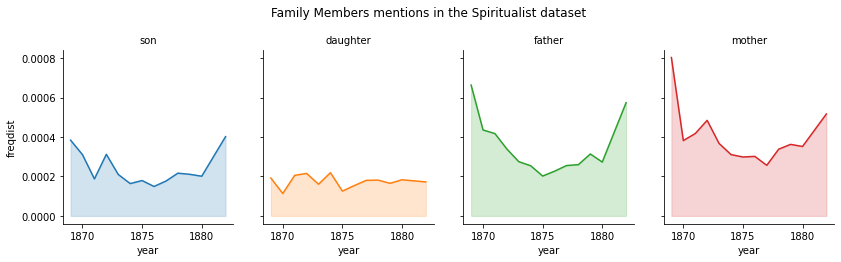

In [5]:
g = sns.FacetGrid(member_df, col='members', hue='members', col_wrap=4, )

g = g.map(plt.plot, 'year', 'freqdist')
 
g = g.map(plt.fill_between, 'year', 'freqdist', alpha=0.2).set_titles("{col_name} members")
 
g = g.set_titles("{col_name}")
 
plt.subplots_adjust(top=1)

g = g.fig.suptitle('Family Members mentions in the Spiritualist dataset', y=1.2)

plt.show()

In [6]:
week_df = df.iloc[:,4:11]
week_df.head()

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
1869,0.000017,0.000122,0.000061,0.000079,0.000166,0.000070,0.000157
1870,0.000090,0.000057,0.000075,0.000108,0.000134,0.000116,0.000302
1871,0.000088,0.000051,0.000085,0.000103,0.000094,0.000079,0.000188
1872,0.000065,0.000081,0.000046,0.000129,0.000092,0.000124,0.000124
1873,0.000125,0.000090,0.000142,0.000253,0.000097,0.000091,0.000290


<AxesSubplot:>

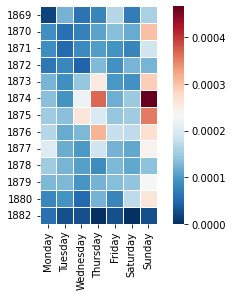

In [7]:
# Default heatmap: just a visualization of this square matrix
sns.heatmap(week_df,square=True,linewidths=1, linecolor = 'white',cmap="RdBu_r")

In [8]:
death_df = df.iloc[:,11:14]
death_df.head()

,murder,suicide,illness
1869,14.0,2.0,2.0
1870,14.0,4.0,24.0
1871,2.0,6.0,18.0
1872,26.0,20.0,16.0
1873,14.0,8.0,32.0


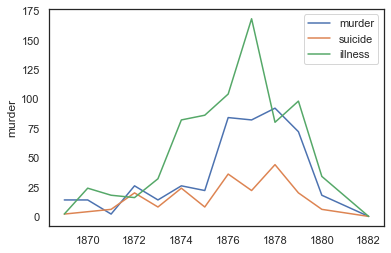

In [9]:
sns.set_theme(style = "white")
plot_murder = sns.lineplot(data = death_df['murder'],label='murder')
plot_suicide = sns.lineplot(data = death_df['suicide'],label='suicide')
plot_illness = sns.lineplot(data = death_df['illness'],label='illness')

In [10]:
n_df = pd.read_csv('data-names-stories.csv',header = 0, index_col = 0)
n_df.head()

,Mrs,Miss,divorce,Rogers,Eglinton,Weldon,Wilkinson
1869,0.001031,0.000201,0.000000,0.0,0.0,0.0,17.0
1870,0.001421,0.000379,0.000006,7.0,0.0,1.0,27.0
1871,0.001782,0.000469,0.000012,6.0,0.0,0.0,50.0
1872,0.001411,0.001118,0.000000,17.0,0.0,0.0,28.0
1873,0.001494,0.000999,0.000003,37.0,0.0,0.0,4.0


In [11]:
name_df = n_df.iloc[:,3:7]
name_df.head()

,Rogers,Eglinton,Weldon,Wilkinson
1869,0.0,0.0,0.0,17.0
1870,7.0,0.0,1.0,27.0
1871,6.0,0.0,0.0,50.0
1872,17.0,0.0,0.0,28.0
1873,37.0,0.0,0.0,4.0


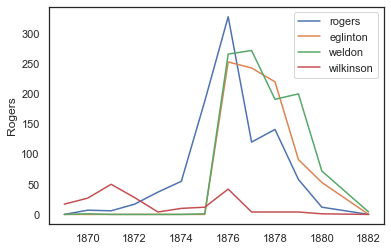

In [12]:
plot_rogers = sns.lineplot(data = name_df['Rogers'],label='rogers')
plot_eglinton = sns.lineplot(data = name_df['Eglinton'],label='eglinton')
plot_weldon = sns.lineplot(data = name_df['Weldon'],label='weldon')
plot_wilkinson = sns.lineplot(data = name_df['Wilkinson'],label='wilkinson')

In [13]:
title_df = n_df.iloc[:,0:3]
title_df.head()

,Mrs,Miss,divorce
1869,0.001031,0.000201,0.000000
1870,0.001421,0.000379,0.000006
1871,0.001782,0.000469,0.000012
1872,0.001411,0.001118,0.000000
1873,0.001494,0.000999,0.000003


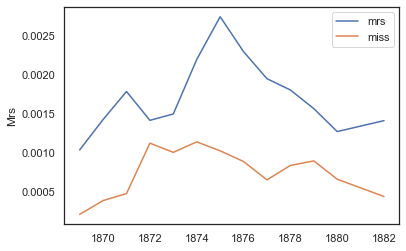

In [14]:
plot_mrs = sns.lineplot(data = title_df['Mrs'],label='mrs')
plot_miss = sns.lineplot(data = title_df['Miss'],label='miss')

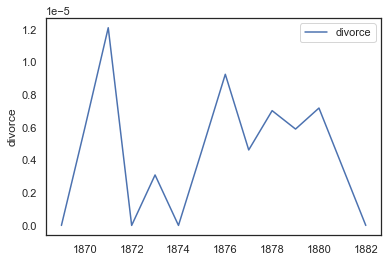

In [15]:
plot_divorce = sns.lineplot(data = title_df['divorce'],label='divorce')

In [19]:
m_df = pd.read_csv('data-key-members-storyline.csv',header = 0, index_col = 0)
m_df.head()

,Rogers,Weldon,Wallace,Dale,Crookes,Cook
1869,0,0,16,1,0,7
1870,7,1,57,3,61,20
1871,6,0,52,11,125,22
1872,17,0,81,16,83,274
1873,37,0,50,18,37,390


In [20]:
m_df = m_df.T
figure_df = m_df.stack().reset_index()
figure_df.columns = ['figure','year','freqdist']
figure_df.head()

,figure,year,freqdist
0,Rogers,1869,0
1,Rogers,1870,7
2,Rogers,1871,6
3,Rogers,1872,17
4,Rogers,1873,37


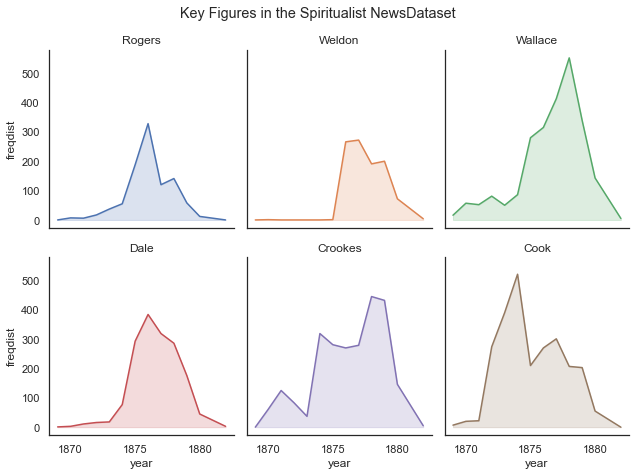

In [26]:
figure = sns.FacetGrid(figure_df, col='figure', hue='figure', col_wrap=3, )

figure = figure.map(plt.plot, 'year', 'freqdist')
 
figure = figure.map(plt.fill_between, 'year', 'freqdist', alpha=0.2).set_titles("{col_name} figure")
 
figure = figure.set_titles("{col_name}")
 
plt.subplots_adjust(top=1)

figure = figure.fig.suptitle('Key Figures in the Spiritualist NewsDataset', y=1.1)

plt.show()